# EDA - SeaAlert (300 samples)


### Block 1 - Setup
**Goal:** Import libraries, configure display options, and set a fixed random seed for reproducibility.


In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option("display.max_colwidth", 160)
pd.set_option("display.max_columns", 50)

RANDOM_SEED = 42

### Block 2 - Load Data and Quick Preview
**Goal:** Load the CSV and get a first feel for the dataset.
- Print dataset shape (rows, columns)
- Show first rows (`head`)
- List column names
- Display a random sample


In [4]:
DATA_PATH = "../data/subset_300/SeaAlert_300samples.csv"

df = pd.read_csv(DATA_PATH)

print("Shape:",df.shape)
display(df.head(5))

print("\nColumns:",df.columns.tolist())

display(df.sample(n=3 ,random_state=RANDOM_SEED))

Shape: (300, 13)


,label,scenario_type,style,vessel,call_sign,mmsi,location,weather,pob,has_codeword,codeword_type,codeword,text
0,Routine,position_report,informal,NaN,4XAB1,653035110.0,5 nm west of Haifa,NaN,NaN,False,NONE,NaN,"Uh, station listening, we’re at 5 nm west of Haifa… call sign 4XAB1, MMSI 653035110. Just giving our position report, please confirm you copy."
1,Routine,radio_check,informal,NaN,4XCD2,NaN,Eilat Marina,NaN,NaN,False,NONE,NaN,"Eilat Marina, anyone on VHF copy? This is call sign 4XCD2, just doing a radio check, can you hear me?"
2,Routine,position_report,third_party,SEA BREEZE,4XCD2,653778756.0,Hadera power station area,heavy rain,POB UNKNOWN,False,NONE,NaN,"RELAY, RELAY, RELAY. RECEIVED FROM SEA BREEZE. SEA BREEZE, call sign 4XCD2, MMSI 653778756, REPORTING POSITION AT Hadera power station area. WEATHER HEAVY R..."
3,Routine,tow_request,informal,NaN,4XAB1,693303705.0,Ashdod Port,NaN,5 PERSONS ON BOARD,False,NONE,NaN,"Any station, any station, we need a tow request at Ashdod Port. Call sign 4XAB1, MMSI 693303705. We’ve got 5 PERSONS ON BOARD and we can’t make way, need as..."
4,Routine,position_report,informal,SEA BREEZE,NaN,444703907.0,Ashdod Port,heavy rain,NaN,False,NONE,NaN,"Sea Breeze, MMSI 444703907… we’re in Ashdod Port right now, heavy rain, just giving our position report—please confirm you copy."



Columns: ['label', 'scenario_type', 'style', 'vessel', 'call_sign', 'mmsi', 'location', 'weather', 'pob', 'has_codeword', 'codeword_type', 'codeword', 'text']


,label,scenario_type,style,vessel,call_sign,mmsi,location,weather,pob,has_codeword,codeword_type,codeword,text
203,Urgency,medical_issue,third_party,COASTAL SPIRIT,4XJK5,395381429.0,Netanya coastline,strong wind,POB UNKNOWN,False,NONE,NaN,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM COASTAL SPIRIT, CALL SIGN 4XJK5, MMSI 395381429. REPORTING A MEDICAL ISSUE ON BOARD. POSITION Netanya coast..."
266,Distress,taking_on_water,informal,NaN,4XEF3,299282456.0,10 nm offshore of Herzliya Marina,NaN,NaN,True,MAYDAY,MAYDAY,"Mayday, mayday, mayday! We’re taking on water, 10 nm offshore of Herzliya Marina. Call sign 4XEF3, MMSI 299282456. Water’s coming in fast, we need immediate..."
152,Urgency,medical_issue,formal,MEDITERRANEAN DREAM,4XAB1,548717183.0,29°33.0'N 034°57.0'E (Eilat area),strong wind,5 PERSONS ON BOARD,True,PAN PAN,PAN PAN,"PAN PAN, PAN PAN, PAN PAN \nTHIS IS MEDITERRANEAN DREAM, MEDITERRANEAN DREAM, MEDITERRANEAN DREAM \nCALL SIGN 4XAB1 MMSI 548717183 \nPOSITION 29°33.0'N 0..."


### Block 2 - Summary (Outputs & Findings)
- Loaded the dataset successfully and confirmed the file path is correct.
- Verified the dataframe shape and inspected sample rows to understand the structure and content.


------------------------------------------------------------------------------------------------------------------------

### Block 3 - Schema + Missing Values + Basic Category Overview

**Goal:** Inspect the dataset structure and perform quick sanity checks.
- Print the dataset schema (column types, non-null counts, memory usage).
- Identify missing values per column.
- Count empty/blank


In [92]:
display(df.info())

missing = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values:")
display(missing[missing>0].reset_index(name= 'count'))


if "text" in df.columns:
    empty_text = df["text"].astype(str).str.strip().eq("").sum()
    print("\nEmpty/blank text rows:", empty_text)
    

for col in ["label","style"]:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        display(df[col].value_counts(dropna= False).reset_index(name= 'count'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   label          300 non-null    object 
 1   scenario_type  300 non-null    object 
 2   style          300 non-null    object 
 3   vessel         229 non-null    object 
 4   call_sign      231 non-null    object 
 5   mmsi           239 non-null    float64
 6   location       276 non-null    object 
 7   weather        224 non-null    object 
 8   pob            234 non-null    object 
 9   has_codeword   300 non-null    bool   
 10  codeword_type  300 non-null    object 
 11  codeword       164 non-null    object 
 12  text           300 non-null    object 
 13  text_str       300 non-null    object 
 14  word_count     300 non-null    int64  
 15  char_count     300 non-null    int64  
 16  alnum_count    300 non-null    int64  
dtypes: bool(1), float64(1), int64(3), object(12)
memory us

None


Missing values:


,index,count
0,codeword,136
1,weather,76
2,vessel,71
3,call_sign,69
4,pob,66
5,mmsi,61
6,location,24



Empty/blank text rows: 0

Unique values in label:


,label,count
0,Routine,75
1,Safety,75
2,Urgency,75
3,Distress,75



Unique values in style:


,style,count
0,third_party,126
1,informal,112
2,formal,62



### Block 3 - Summary (Outputs & Findings)
- The core fields (`text`, `label`) are complete with no missing values.
- Missing values exist mainly in optional metadata columns (expected in synthetic generation).
- Verified the set of unique values for key categorical columns (`label`, `style`).


------------------------------------------------------------------------------------------------------------------------

### Block 4 - Duplicate and Consistency Checks

**Goal:** Detect duplicated samples and potential labeling inconsistencies.
- Count fully duplicated rows (exact duplicates across all columns).
- Count duplicated `text` entrie


In [137]:
print("Duplicated rows:",df.duplicated().sum())

if 'text' in df.columns:
    dup_text=df.duplicated(subset= ['text']).sum()
    print("\nDuplicated texts:",dup_text)
  

if 'label' in df.columns:
    n_labels_per_text = df.groupby('text')['label'].nunique()
    multi_label_texts = n_labels_per_text[n_labels_per_text > 1].reset_index(name='n_labels')
    
    print("\nSame text with multiple labels (potential label noise/leakage):",len(multi_label_texts))
    display(multi_label_texts.head(10))



Duplicated rows: 0

Duplicated texts: 0

Same text with multiple labels (potential label noise/leakage): 0


,text,n_labels


### Block 4 - Summary (Outputs & Findings)
- No full-row duplicates and no duplicated `text` entries were found.
- No cases where the same `text` appears with multiple labels (no obvious label-noise via duplicates).


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Block 5 - Label Distribution (Class Balance)

**Goal:** Understand class balance across `label`.
- Compute the number of samples per label.
- Visualize label counts with a bar chart.
- Show label proportions to quantify imbalance (if any).


Counts per label:


,label,count,proportions
0,Routine,75,0.25
1,Safety,75,0.25
2,Urgency,75,0.25
3,Distress,75,0.25


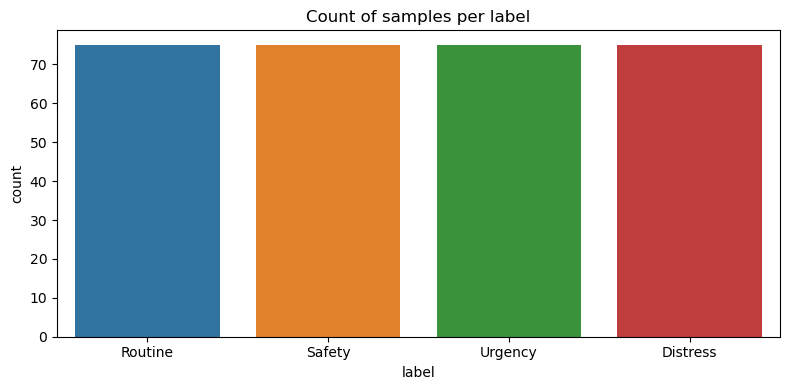

In [ ]:
label_counts = df['label'].value_counts().reset_index(name= 'count')
label_counts['proportions'] = (label_counts['count'] / len(df)).round(3)
print("Counts per label:")
display(label_counts)


plt.figure(figsize=(8,4))
sns.countplot(data=df, x= 'label',hue= 'label')
plt.title('Count of texts per label')
plt.tight_layout()
plt.show()

### Block 5 - Summary (Outputs & Findings)
- The dataset is perfectly balanced across the 4 labels (75 samples per class).
- Class balance reduces the risk of biased training or misleading accuracy due to imbalance.


------------------------------------------------------------------------------------------------------------------------

### Block 6 - Style vs Label (Confounder / Shortcut Risk)

**Goal:** Check whether `style` is strongly associated with `label`.
- Count samples per style.
- Compute a normalized cross-tab (**P(label | style)**) to see how labels distribute within each style.
- Visualize style distribution with label as hue to spot potential shortcuts (model learning sty



Counts per style:


,style,count
0,third_party,126
1,informal,112
2,formal,62



P(label | style):


label,Distress,Routine,Safety,Urgency
style,,,,
formal,0.371,0.000,0.339,0.290
informal,0.179,0.348,0.259,0.214
third_party,0.254,0.286,0.198,0.262


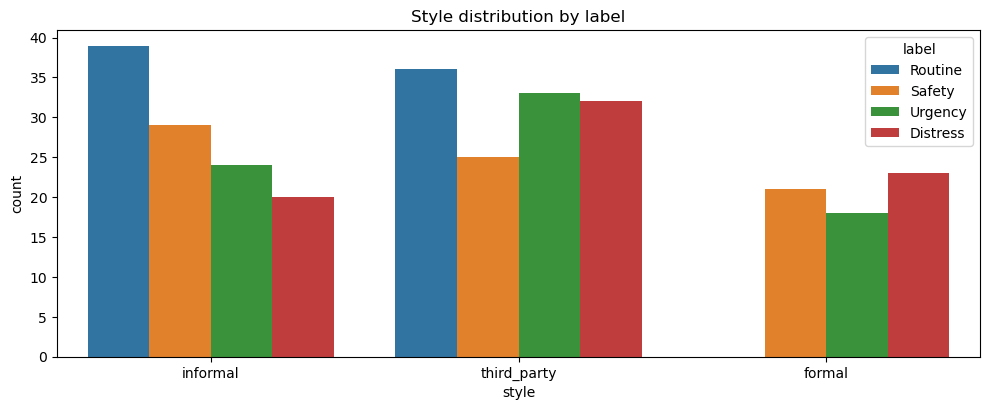

In [133]:
if 'style' in df.columns:
    style_counts = df['style'].value_counts().reset_index(name= 'count')
    print("\nCounts per style:")
    display(style_counts)


    crosstab = pd.crosstab(df['style'],df['label'],normalize= 'index').round(3)
    print("\nP(label | style):")
    display(crosstab)

    plt.figure(figsize=(10,4))
    sns.countplot(
        data= df,
        x= 'style',
        hue= 'label',
    )
    plt.tight_layout()
    plt.title("Style distribution by label")
    plt.show()
    

### Block 6 - Summary (Outputs & Findings)
- `style` is not balanced and is correlated with label distribution (confounder risk).
- Notably, the `formal` style contains 0 samples of `Routine`, indicating a strong shortcut signal.


------------------------------------------------------------------------------------------------------------------------

### Block 7- Text Length Analysis (Words/Chars) + Outliers

**Goal:** Analyze text length characteristics to anticipate modeling constraints and spot anomalies.
- Create a normalized text column (`text_str`) and compute:
  - `word_count` (number of whitespace-separated words)
  - `char_count` (number of characters)
- Summarize length statistics (describe).
- Visualize distributions (histograms) for words and characters.
- Compare text length across labels (boxen plot) and across style+label (if available).
- Inspect extreme samples (top 5 longest and shortest texts) for sanity checks and outlier detection.


,word_count,char_count,alnum_count
count,300.000000,300.000000,300.000000
mean,32.740000,211.790000,166.523333
std,6.880178,46.901368,36.575337
min,11.000000,67.000000,53.000000
25%,28.000000,181.000000,143.750000
50%,34.000000,212.500000,169.000000
75%,37.000000,245.000000,190.000000
max,57.000000,340.000000,277.000000


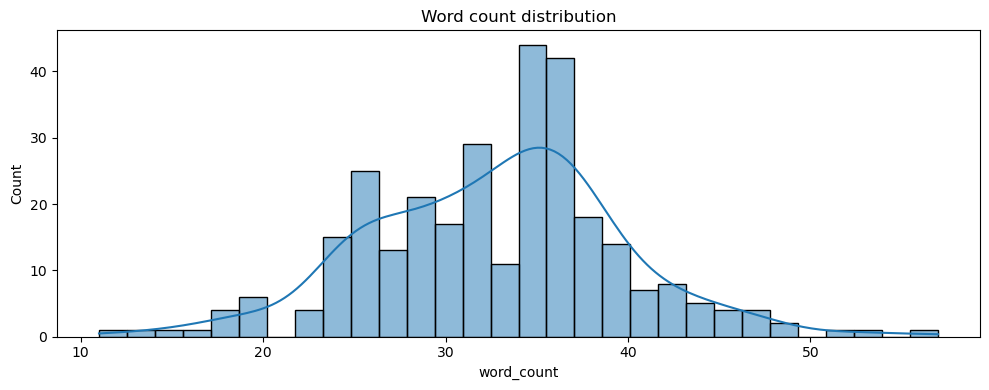

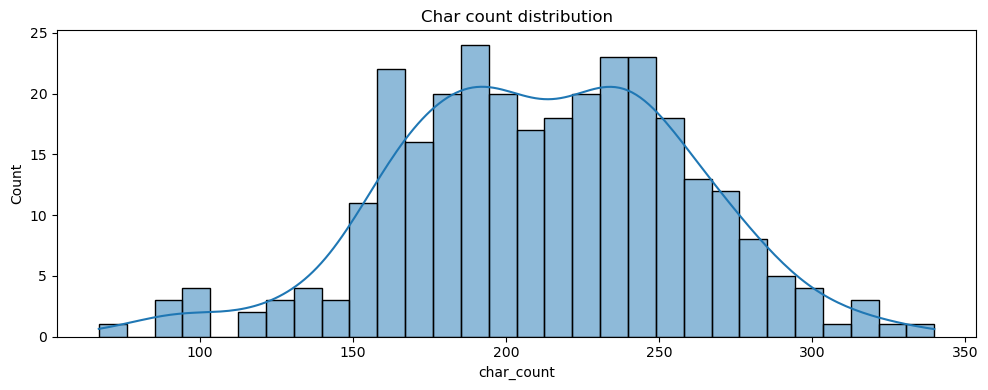

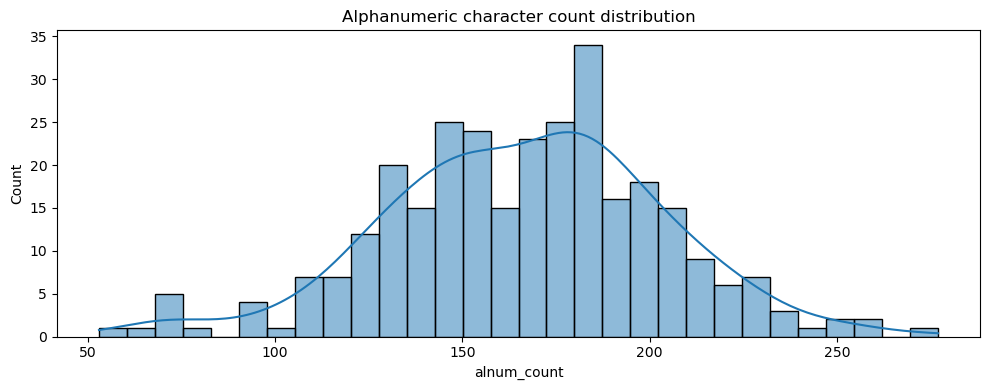

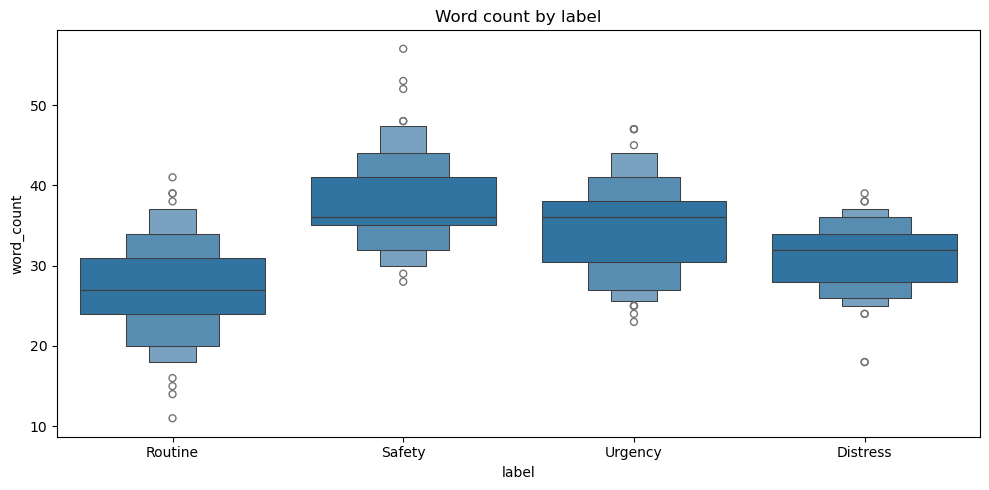

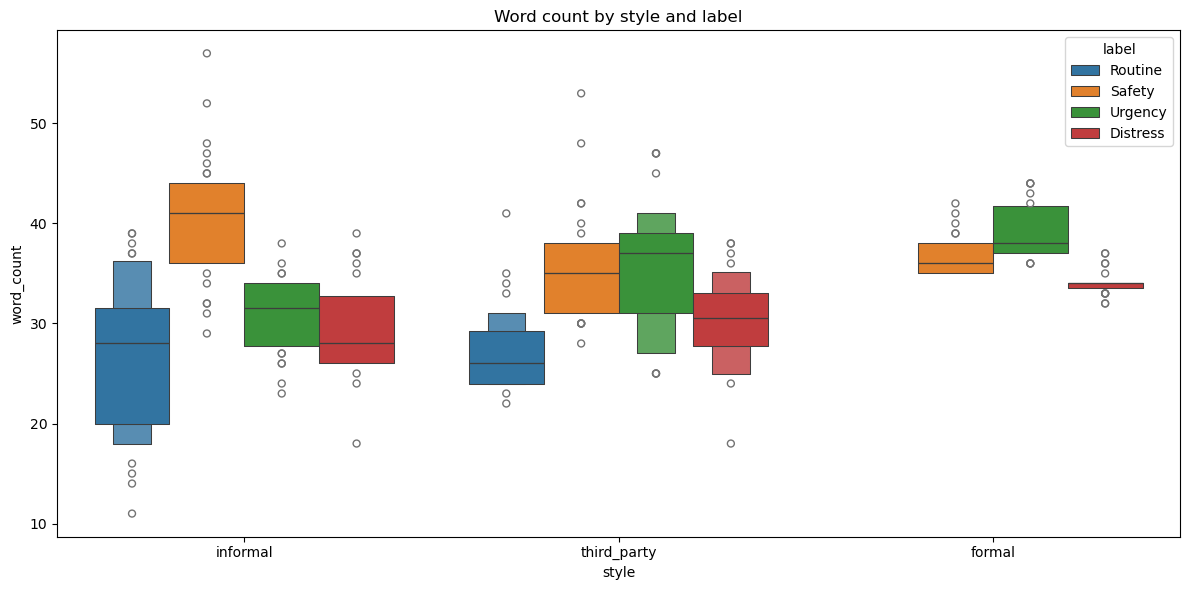

Top 5 longest by words:


,label,style,word_count,text_str
111,Safety,informal,57,"Anyone in the Hadera power station area, please listen—there’s a storm warning out here, choppy waves building fast and it’s getting nasty. We’ve got 4 PERS..."
97,Safety,third_party,53,"SECURITE RELAY RELAY, SECURITE RELAY RELAY, SECURITE RELAY RELAY. I am MOTOR VESSEL SILVER DAWN. RECEIVED SECURITE RELAY FROM SEA BREEZE, call sign 4XJK5, M..."
113,Safety,informal,52,"Coastal Spirit calling—there’s a navigation hazard, a big floating object/debris in the water at 5 nm west of Haifa. Nearly hit it, it’s hard to see and rig..."
84,Safety,informal,48,"Securite, securite, securite — RED SEA RUNNER, mmsi 306551233. Navigation hazard: we’ve got a large floating object/debris in the water at 10 nm offshore of..."
87,Safety,third_party,48,"SECURITE RELAY RELAY, SECURITE RELAY RELAY, SECURITE RELAY RELAY\n\nTHIS IS COASTAL WATCHER. RECEIVED SECURITE RELAY FROM RED SEA RUNNER, CALL SIGN 4XLM6, M..."


Top 5 shortest by words:


,label,style,word_count,text_str
31,Routine,informal,11,"We’re at Ashdod Port, position report—there are 5 PERSONS ON BOARD."
15,Routine,informal,14,"We’re at Eilat Marina right now, heavy rain, just giving a position report—standing by."
5,Routine,informal,15,"Coastal Spirit calling, can anyone hear me? Just need a quick radio check. MMSI 276667861."
45,Routine,informal,16,"Coastal Spirit, call sign 4XCD2, MMSI 591079829 — position report, we’ve got 4 persons on board."
294,Distress,informal,18,"Mayday, mayday! Person overboard at Palmahim Beach! We’ve lost sight of them, need immediate assistance—anyone nearby please respond!"


In [84]:
df['text_str'] = df['text'].astype(str)


df['word_count'] = df['text_str'].apply(lambda text: (len(text.split())))
df["char_count"] = df["text_str"].apply(len)
df["alnum_count"] = df["text_str"].str.replace( r"[^A-Za-z0-9]", "", regex=True).str.len()

display(df[['word_count','char_count','alnum_count']].describe())




plt.figure(figsize=(10,4))
sns.histplot(data= df, x= "word_count", bins= 30,kde= True)
plt.title("Word count distribution")
plt.tight_layout()
plt.show()




plt.figure(figsize=(10,4))
sns.histplot(data= df, x= "char_count", bins= 30,kde= True)
plt.title("Char count distribution")
plt.tight_layout()
plt.show()




plt.figure(figsize=(10,4))
sns.histplot(data= df, x= "alnum_count", bins= 30,kde= True)
plt.title("Alphanumeric character count distribution")
plt.tight_layout()
plt.show()




plt.figure(figsize=(10,5))
sns.boxenplot(data= df, x= 'label', y= 'word_count')
plt.title("Word count by label")
plt.tight_layout()
plt.show()




if "style" in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxenplot(data=df, x="style", y="word_count", hue="label")
    plt.title("Word count by style and label")
    plt.tight_layout()
    plt.show()


print("Top 5 longest by words:")
display(df.sort_values("word_count", ascending=False)[["label","style","word_count","text_str"]].head(5))

print("Top 5 shortest by words:")
display(df.sort_values("word_count", ascending=True)[["label","style","word_count","text_str"]].head(5))


### Block 7 - Summary (Outputs & Findings)
- Text lengths are moderate (roughly 11-57 words) and unlikely to cause truncation issues.
- Length differs by label/style, so word/char length may act as a weak shortcut feature.
- Outlier inspection confirms the longest/shortest samples look reasonable.


------------------------------------------------------------------------------------------------------------------------

### Block 8 - Codeword Extraction and Validation (Domain Signal)

**Goal:** Extract maritime distress codewords from the text and validate their alignment with labels.
- Parse each message for key codewords: `MAYDAY`, `PAN PAN`, `SECURITE`, otherwise `NONE`.
- Create `actual_codeword` and a binary flag `code_presence` (With/No codeword).
- Summarize codeword frequency across the dataset.
- Cross-tabulate `label` vs `actual_codeword` to check consistency and spot mismatches.
- Visualize how often each label contains a codeword vs none.
- Inspect critical anomalies (e.g., `Distress` samples with `NONE`) for manual auditing.



Codeword counts:


,actual_codeword,count
0,NONE,136
1,PAN PAN,55
2,MAYDAY,55
3,SECURITE,54



Crosstab label vs actual_codeword:


actual_codeword,MAYDAY,NONE,PAN PAN,SECURITE
label,,,,
Distress,55,20,0,0
Routine,0,75,0,0
Safety,0,21,0,54
Urgency,0,20,55,0


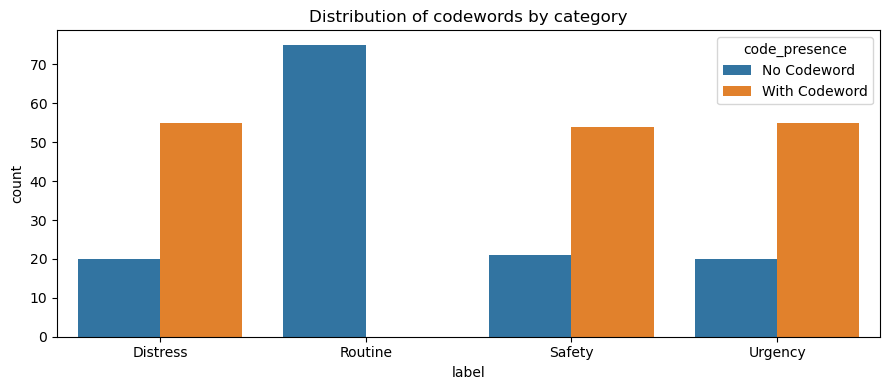

Distress with NONE codeword: 20


,style,text_str
226,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM BLUE HORIZON, CALL SIGN 4XGH4, MMSI 738824588. REPORTING FIRE ONBOARD BLUE HORIZON AT Eilat Marina. WEATHER..."
231,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM GALILEE STAR. PERSON OVERBOARD REPORTED. POSITION Netanya coastline. WEATHER fog. OVER"
246,third_party,"RELAY, RELAY, RELAY. RECEIVED FROM COASTAL SPIRIT, CALL SIGN 4XEF3, MMSI 326074193. PERSON OVERBOARD REPORTED. POSITION: Hadera power station area. WEATHER:..."
248,third_party,"RELAY, RELAY, RELAY\n\nRECEIVED DISTRESS CALL FROM RED SEA RUNNER, CALL SIGN 4XGH4, MMSI 777155220. RED SEA RUNNER IS TAKING ON WATER. POSITION REPORTED AS ..."
249,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM SEA BREEZE, CALL SIGN 4XJK5, MMSI 679691987. SEA BREEZE IS TAKING ON WATER. POSITION: Palmahim Beach. WEATH..."


Urgency with NONE codeword: 20


,style,text_str
159,third_party,"RELAY, RELAY, RELAY. RECEIVED FROM RED SEA RUNNER. RED SEA RUNNER, call sign 4XLM6, MMSI 244047803, is drifting at 10 nm offshore of Herzliya Marina. Weath..."
162,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM BLUE HORIZON, CALL SIGN 4XEF3, MMSI 600346767. BLUE HORIZON IS DRIFTING AT Netanya coastline. WEATHER HEAVY..."
164,informal,"Red Sea Runner, call sign 4XLM6… we’re drifting off Palmahim Beach, strong wind pushing us, we can’t hold position and we’re getting blown along—need assist..."
169,informal,"Sea Breeze, call sign 4XGH4, MMSI 591163514… we’re drifting, no propulsion, can’t hold position. We’re 10 nm offshore of Herzliya Marina. Need assistance fa..."
170,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM MEDITERRANEAN DREAM. MEDITERRANEAN DREAM, CALL SIGN 4XCD2, MMSI 773390109, IS DRIFTING IN Hadera power stat..."


Safety with NONE codeword: 21


,style,text_str
78,third_party,"RELAY, RELAY, RELAY\n\nRECEIVED DISTRESS CALL FROM COASTAL SPIRIT, CALL SIGN 4XCD2, MMSI 405665554. REPORTING STORM WARNING CONDITIONS WITH STRONG WIND IN T..."
80,informal,"Any station near Eilat Marina, we’ve got floating debris in the water right here, looks like a hazard to boats—please keep clear and can someone come check ..."
81,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM GALILEE STAR, call sign 4XGH4, MMSI 714015466. Reported floating debris hazard in the vicinity of Palmahim ..."
82,informal,"Sea Breeze, mmsi 362915636 — urgent, we’ve got a navigation hazard right ahead, something in the water and we nearly hit it. We’re slowing right down and tr..."
86,informal,"All stations, all stations—storm warning out here, we’re 10 nm offshore of Herzliya Marina. MMSI 276428684. 6 PERSONS ON BOARD. Sea’s getting nasty fast, we..."


Routine with a codeword: 0


,style,actual_codeword,text_str


In [134]:
def extract_codeword(text :str) -> str:
    t = str(text).upper()
    if "MAYDAY" in t:
        return "MAYDAY"
    if "PAN PAN" in t or "PAN-PAN" in t or "PANPAN" in t:
        return "PAN PAN"
    if "SECURITE" in t or "SÉCURITÉ" in t:
        return "SECURITE"
    return "NONE"

df["actual_codeword"] = df["text_str"].apply(extract_codeword)
df['code_presence'] = df['actual_codeword'].apply(lambda code: 'With Codeword' if code != 'NONE' else 'No Codeword')
print("\nCodeword counts:")
display(df['actual_codeword'].value_counts().reset_index(name= 'count'))


crosstab_label_actual_codeword = pd.crosstab(df['label'],df['actual_codeword'])
print("\nCrosstab label vs actual_codeword:")
display(crosstab_label_actual_codeword)


plot_df = df.groupby(['label','code_presence']).size().reset_index(name= 'count')

plt.figure(figsize=(9,4))
sns.barplot(data=plot_df, x="label", y="count", hue="code_presence")
plt.title("Distribution of codewords by category")
plt.tight_layout()
plt.show()


# Distress without MAYDAY (no codeword found in text)
distress_none = df[(df["label"] == "Distress") & (df["actual_codeword"] == "NONE")]
print("Distress with NONE codeword:", len(distress_none))
display(distress_none[["style", "text_str"]].head(5))


# Urgency without PAN PAN (no codeword found in text)
urgency_none = df[(df["label"] == "Urgency") & (df["actual_codeword"] == "NONE")]
print("Urgency with NONE codeword:", len(urgency_none))
display(urgency_none[["style", "text_str"]].head(5))


# Safety without SECURITE (no codeword found in text)
safety_none = df[(df["label"] == "Safety") & (df["actual_codeword"] == "NONE")]
print("Safety with NONE codeword:", len(safety_none))
display(safety_none[["style", "text_str"]].head(5))


# (Optional) Routine with a codeword (should be ~0 in your dataset)
routine_with_code = df[(df["label"] == "Routine") & (df["actual_codeword"] != "NONE")]
print("Routine with a codeword:", len(routine_with_code))
display(routine_with_code[["style", "actual_codeword", "text_str"]].head(5))



### Block 8 - Summary (Outputs & Findings)
- Codewords are strongly aligned with labels when present (`MAYDAY` -> `Distress`, `PAN PAN` -> `Urgency`, `SECURITE` -> `Safety`).
- A substantial subset contains no codeword (`NONE`), and it includes **all labels**, meaning semantic understanding is required there.
- Manual audits of `NONE` cases (Distress/Urgency/Safety) confirm they still express the intended situation via context.


------------------------------------------------------------------------------------------------------------------------

### Block 9 - Leakage Baseline: Codeword-Only Classifier

**Goal:** Estimate how much performance can be achieved using only codewords (a potential shortcut/leakage signal).
- Build a simple rule-based predictor that maps extracted codewords to labels.
- Compute overall accuracy for this codeword-only baseline.
- Display a row-normalized confusion table to see which labels are easiest/hardest under this shortcut rule.
If this baseline is very strong, the dataset may contain significant shortcut signals and should be handled carefully during modeling/evaluation.


In [130]:
# Codeword-only baseline (only predicts when a codeword exists)

def predict_by_codeword(codeword: str):
    mapping = {
        "MAYDAY": "Distress",
        "PAN PAN": "Urgency",
        "SECURITE": "Safety",
    }
    return mapping.get(codeword, None)  # None = no prediction when codeword is missing

df["pred_codeword_only"] = df["actual_codeword"].apply(predict_by_codeword)

mask = df["pred_codeword_only"].notna()
print("Coverage (has codeword):", round(mask.mean(), 3))  # how many samples this baseline can cover

acc = (df.loc[mask, "pred_codeword_only"] == df.loc[mask, "label"]).mean()
print("Accuracy (codeword-only, on covered subset):", round(acc, 3))

conf = pd.crosstab(
    df.loc[mask, "label"],
    df.loc[mask, "pred_codeword_only"],
    normalize="index"
).round(3)
display(conf)

print("\nLabels when codeword is missing (NONE):")
display(df.loc[~mask, "label"].value_counts().reset_index(name= 'count'))


Coverage (has codeword): 0.547
Accuracy (codeword-only, on covered subset): 1.0


pred_codeword_only,Distress,Safety,Urgency
label,,,
Distress,1.0,0.0,0.0
Safety,0.0,1.0,0.0
Urgency,0.0,0.0,1.0



Labels when codeword is missing (NONE):


,label,count
0,Routine,75
1,Safety,21
2,Urgency,20
3,Distress,20


### Block 9 - Summary (Outputs & Findings)
- Codeword-only baseline achieves perfect accuracy **on the subset where a codeword exists**, but does not cover `NONE` samples.
- This confirms codewords are a strong shortcut and full-dataset metrics can be inflated without context understanding.


------------------------------------------------------------------------------------------------------------------------

### Block 10 - Weak Baseline: Keyword Matching (Rule-Based)

**Goal:** Create a lightweight semantic baseline using domain keywords and inspect where it fails.
- Define a small keyword list per label (`keywords_dict`).
- Predict labels by counting keyword hits in each text.
- Report overall accuracy and a row-normalized confusion table.
- Display a sample of mismatches (true label vs predicted) to diagnose missing keywords, ambiguous phrasing, or labeling issues.
This baseline is useful as a simple reference point before training ML/LLM models.


In [136]:
keywords_dict = {
    "Distress": ["taking on water", "person overboard", "fire onboard"],
    "Urgency":  ["engine failure", "drifting", "medical issue"],
    "Safety":   ["floating debris", "storm warning", "navigation hazard"],
    "Routine":  ["position report", "tow request", "radio check"],
}

def predict_by_keywords(text: str) -> str:
    t = str(text).lower()
    scores = {}
    for lbl, kws in keywords_dict.items():
        scores[lbl] = sum(1 for kw in kws if kw in t)
    best = max(scores, key=scores.get)
    if scores[best] == 0:
        return "Routine"  
    return best

df["pred_keywords"] = df["text_str"].apply(predict_by_keywords)
acc_kw = (df["pred_keywords"] == df["label"]).mean()
print("Accuracy (keywords baseline):", round(acc_kw, 3))

conf_kw = pd.crosstab(df["label"], df["pred_keywords"], normalize="index").round(3)
print("\nConfusion keywords (row-normalized):")
display(conf_kw)


miss = df[df["pred_keywords"] != df["label"]]
print("Mismatches:", len(miss))
display(miss[["label","pred_keywords","style","text_str"]].head(10))


Accuracy (keywords baseline): 0.93

Confusion keywords (row-normalized):


pred_keywords,Distress,Routine,Safety,Urgency
label,,,,
Distress,0.867,0.133,0.000,0.000
Routine,0.000,0.907,0.000,0.093
Safety,0.000,0.000,0.987,0.013
Urgency,0.000,0.040,0.000,0.960


Mismatches: 21


,label,pred_keywords,style,text_str
25,Routine,Urgency,informal,"Coast Guard, anyone copy? We need a tow request, we’re in trouble off Netanya coastline. Strong wind’s pushing us, we can’t make headway and we’re drifting...."
40,Routine,Urgency,informal,"Galilee Star, call sign 4XCD2, MMSI 316066793… we’re 5 nm west of Haifa and we’ve lost propulsion, drifting and can’t get the engine back. Need a tow urgent..."
44,Routine,Urgency,informal,"Red Sea Runner, call sign 4XCD2… we’re dead in the water, engine’s quit and we can’t get it back. Need a tow as soon as possible, we’re drifting and not mak..."
48,Routine,Urgency,informal,"Any station, any station… we need a tow. We’re 5 nm west of Haifa, poor visibility, we can’t make way and we’re drifting. Can someone come and take us in to..."
60,Routine,Urgency,informal,"Any station, any station, we need a tow urgently. Call sign 4XLM6, we’re 10 nm offshore of Herzliya Marina. Engine’s dead and we’re drifting, 5 PERSONS ON B..."
61,Routine,Urgency,informal,"Any station, any station, I need a tow request—I'm disabled and drifting at 5 nm west of Haifa. Call sign 4XGH4, MMSI 337039296. Please respond, I need assi..."
62,Routine,Urgency,informal,"Any station, any station… MEDITERRANEAN DREAM here. We’ve lost propulsion and we’re drifting, can’t make way. Need a tow urgently before we get into trouble..."
119,Safety,Urgency,informal,"Coast guard, anyone on VHF—I'm at Palmahim Beach, call sign 4XLM6. There’s floating debris in the water close in, looks like it could be from a boat, drifti..."
155,Urgency,Routine,informal,"Pan pan, pan pan, pan pan… RED SEA RUNNER—our engine’s failed, we’re dead in the water and getting pushed around in strong wind. We’ve got 6 persons on boar..."
180,Urgency,Routine,informal,"Pan pan, pan pan, pan pan. This is call sign 4XEF3 at Ashdod Port—medical emergency onboard, person collapsed and not responding properly, we need urgent me..."


### Block 10 - Summary (Outputs & Findings)
- A simple keyword baseline already achieves high accuracy, indicating repetitive phrasing and strong lexical cues.
- Most errors are concentrated around the Routine vs Urgency boundary, suggesting genuine semantic ambiguity.


------------------------------------------------------------------------------------------------------------------------

### Block 11 - Manual Audit (Sanity Check)

**Goal:** Manually inspect examples to validate label quality and dataset realism.
- Display a few random samples for each label to understand typical phrasing and structure.
- Perform a focused audit of critical anomalies (e.g., `Distress` samples with no extracted codeword) to catch labeling/generation issues.
This step helps build confidence in the dataset before training and evaluation.


In [129]:
for lbl in df["label"].unique():
    print("\nRandom samples for label:", lbl)
    display(df[df["label"] == lbl][["style","actual_codeword","text_str"]].sample(3, random_state=RANDOM_SEED))


print("\nDistress without codeword (manual audit):")
distress_none = df[(df["label"]=="Distress") & (df["actual_codeword"]=="NONE")]
display(distress_none[["style","text_str"]].head(10))



Random samples for label: Routine


,style,actual_codeword,text_str
4,informal,NONE,"Sea Breeze, MMSI 444703907… we’re in Ashdod Port right now, heavy rain, just giving our position report—please confirm you copy."
63,third_party,NONE,"RELAY, RELAY, RELAY. RECEIVED MESSAGE FROM MEDITERRANEAN DREAM. MEDITERRANEAN DREAM, CALL SIGN 4XEF3, MMSI 652651788, REQUESTING TOW ASSISTANCE AT Ashdod Po..."
10,third_party,NONE,"RELAY, RELAY, RELAY. RECEIVED FROM SEA BREEZE, call sign 4XAB1, MMSI 317734861. SEA BREEZE REQUESTS RADIO CHECK. POSITION 5 nm west of Tel Aviv. WEATHER STR..."



Random samples for label: Safety


,style,actual_codeword,text_str
79,third_party,SECURITE,"SECURITE RELAY, SECURITE RELAY, SECURITE RELAY\n\nTHIS IS SILVER HARBOR, RELAYING. RECEIVED SECURITE RELAY FROM RED SEA RUNNER. REPORTING FLOATING DEBRIS IN..."
138,informal,SECURITE,"Securite, securite, securite. All stations, all stations—this is SEA BREEZE at Ashdod Port. Storm warning, conditions building fast, strong winds and rough ..."
85,third_party,SECURITE,"SECURITE RELAY RELAY RELAY, SECURITE RELAY RELAY RELAY, SECURITE RELAY RELAY RELAY. THIS IS SILVER HORIZON. RECEIVED SECURITE RELAY FROM SEA BREEZE, CALL SI..."



Random samples for label: Urgency


,style,actual_codeword,text_str
154,formal,PAN PAN,"PAN PAN, PAN PAN, PAN PAN \nTHIS IS SEA BREEZE, SEA BREEZE, SEA BREEZE \nCALL SIGN 4XJK5 MMSI 322435172 \nPOSITION 32°10.0'N 034°48.0'E (Herzliya area) ..."
213,formal,PAN PAN,"PAN PAN, PAN PAN, PAN PAN \nTHIS IS BLUE HORIZON, BLUE HORIZON, BLUE HORIZON \nCALL SIGN 4XAB1 MMSI 254337019 \nPOSITION 32°19.0'N 034°51.0'E (Netanya ar..."
160,third_party,PAN PAN,"PAN PAN RELAY, PAN PAN RELAY, PAN PAN RELAY. This is Coastal Watcher. RECEIVED PAN PAN RELAY FROM BLUE HORIZON, call sign 4XAB1, MMSI 683745511. Medical iss..."



Random samples for label: Distress


,style,actual_codeword,text_str
229,formal,MAYDAY,"MAYDAY, MAYDAY, MAYDAY \nTHIS IS GALILEE STAR, GALILEE STAR, GALILEE STAR \nCALL SIGN 4XJK5 MMSI 520511037 \nPOSITION 32°28.0'N 034°52.0'E (HADERA AREA) ..."
288,third_party,MAYDAY,"MAYDAY RELAY, MAYDAY RELAY, MAYDAY RELAY. I am Silver Horizon relaying. RECEIVED MAYDAY RELAY FROM MEDITERRANEAN DREAM, call sign 4XLM6, MMSI 780424495. Rep..."
235,third_party,MAYDAY,"MAYDAY RELAY, MAYDAY RELAY, MAYDAY RELAY. RECEIVED MAYDAY RELAY FROM BLUE HORIZON, CALL SIGN 4XLM6, MMSI 450006353. REPORTING PERSON OVERBOARD FROM BLUE HOR..."



Distress without codeword (manual audit):


,style,text_str
226,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM BLUE HORIZON, CALL SIGN 4XGH4, MMSI 738824588. REPORTING FIRE ONBOARD BLUE HORIZON AT Eilat Marina. WEATHER..."
231,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM GALILEE STAR. PERSON OVERBOARD REPORTED. POSITION Netanya coastline. WEATHER fog. OVER"
246,third_party,"RELAY, RELAY, RELAY. RECEIVED FROM COASTAL SPIRIT, CALL SIGN 4XEF3, MMSI 326074193. PERSON OVERBOARD REPORTED. POSITION: Hadera power station area. WEATHER:..."
248,third_party,"RELAY, RELAY, RELAY\n\nRECEIVED DISTRESS CALL FROM RED SEA RUNNER, CALL SIGN 4XGH4, MMSI 777155220. RED SEA RUNNER IS TAKING ON WATER. POSITION REPORTED AS ..."
249,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM SEA BREEZE, CALL SIGN 4XJK5, MMSI 679691987. SEA BREEZE IS TAKING ON WATER. POSITION: Palmahim Beach. WEATH..."
255,informal,"Red Sea Runner, call sign 4XGH4… we’re taking on water, it’s coming in fast and we can’t keep up. Visibility’s terrible in this fog. Need immediate assistan..."
257,informal,"Coast Guard, anyone copy? We’ve got a fire onboard, it’s spreading fast, we can’t get it under control. We’re at Netanya coastline. Call sign 4XAB1, MMSI 23..."
260,third_party,"RELAY, RELAY, RELAY\n\nRECEIVED DISTRESS CALL FROM BLUE HORIZON, CALL SIGN 4XAB1, MMSI 350469429. BLUE HORIZON IS TAKING ON WATER. POSITION: Hadera power st..."
261,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM RED SEA RUNNER, CALL SIGN 4XEF3, MMSI 544311548. RED SEA RUNNER IS TAKING ON WATER. POSITION: Hadera power ..."
262,third_party,"RELAY, RELAY, RELAY. RECEIVED DISTRESS CALL FROM BLUE HORIZON, CALL SIGN 4XGH4, MMSI 522660441. REPORTING FIRE ON BOARD. POSITION 5 nm west of Haifa. WEATHE..."


### Block 11 - Summary (Outputs & Findings)
- Random samples per label look consistent and realistic, supporting label validity.
- Focused audits on “no-codeword” critical cases strengthen confidence that the dataset contains meaningful hard examples.

------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------

## EDA Summary (SeaAlert - 300 Samples)

- **Size:** 300 samples, 13 columns. **Labels:** 4 classes, perfectly balanced (75 each). **Empty texts:** 0.
- **Missing values (metadata):** `codeword` 136, `weather` 76, `vessel` 71, `call_sign` 69, `pob` 66, `mmsi` 61, `location` 24. Core fields (`text`, `label`) are complete.
- **Data quality:** No duplicates (full-row=0, text=0). No same text with multiple labels (0).

### Shortcut / Bias Signals
- **Style imbalance:** `third_party` 126, `informal` 112, `formal` 62. Strong correlation with label distribution (notably: `formal` has **0 Routine**).
- **Text length:** mean ~32.7 words (range 11-57), mean ~211.8 chars. Length differs by label/style and may act as a weak shortcut.

### Codewords (Domain Cue)
- Extracted: `MAYDAY` 55, `PAN PAN` 55, `SECURITE` 54, `NONE` 136.
- **Coverage:** ~54.7% contain a codeword. When present, codewords map almost perfectly to labels.
- `NONE` is not equal to Routine: NONE subset labels = Routine 75, Safety 21, Urgency 20, Distress 20.

### Baselines
- **Codeword-only (predict only when codeword exists):** coverage ~0.547, accuracy **1.0** on covered subset.
- **Keyword baseline:** accuracy **0.93** (21 mismatches), most errors around **Routine vs Urgency** (tow/engine/drifting boundary).

### Main Takeaway
- Overall dataset is clean and balanced, but contains strong shortcut cues (codewords + style).
- Project novelty should be evaluated primarily on the **NO-codeword (NONE) subset**, and optionally with **masked codewords** to validate true context understanding.
